In [2]:
%run ../../../../../../../../recidiviz-research/utils/research_utils.py

In [3]:
adjust_plot_scale(0.4)

In [4]:
data_path = "../sentencing_data/"

common_columns = [
    "TOTPRISN",
    "AGE",
    "VIOL1PTS",
    "SENTMON",
    "SENTYR",
    "NEWRACE",
    "MONRACE",
    "HISPORIG",
    "COMBDRG2",
    "DRUGTYP1",
    "SENTIMP",
    "CRIMHIST",
    "CITIZEN",
    "NWSTAT1",
    "NWSTAT2",
    "NWSTAT3",
    "NWSTAT4",
    "NWSTAT5",
    "DISTRICT",
    "NOUSTAT",
    "EDUCATN",
]

new_data_columns = common_columns + [
    "OFFGUIDE",
]
old_data_columns = common_columns + [
    "OFFTYPSB",
]

new_data_files = ["opafy20nid.csv", "opafy19nid.csv", "opafy18nid.csv"]
old_data_files = ["opafy17nid.csv", "opafy16nid.csv", "opafy15nid.csv"]

new_data = pd.DataFrame()
for file in new_data_files:
    temp = pd.read_csv(data_path + file, usecols=new_data_columns)
    temp = temp[temp["COMBDRG2"] == 4]
    new_data = pd.concat([new_data, temp])

print("New data processed", len(new_data))

old_data = pd.DataFrame()
for file in old_data_files:
    temp = pd.read_csv(data_path + file, usecols=old_data_columns)
    temp = temp[temp["COMBDRG2"] == 4]
    old_data = pd.concat([old_data, temp])

print("Old data processed", len(old_data))

/var/folders/0j/xkvk5w791vj4vtys8s77jn4w0000gn/T/ipykernel_26976/1945228395.py:39: DtypeWarning: Columns (16730,16731,16732,16733) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(data_path + file, usecols=new_data_columns)
/var/folders/0j/xkvk5w791vj4vtys8s77jn4w0000gn/T/ipykernel_26976/1945228395.py:39: DtypeWarning: Columns (17586,17587,17588) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(data_path + file, usecols=new_data_columns)
/var/folders/0j/xkvk5w791vj4vtys8s77jn4w0000gn/T/ipykernel_26976/1945228395.py:39: DtypeWarning: Columns (27567,27568,27569) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(data_path + file, usecols=new_data_columns)


New data processed 7008


/var/folders/0j/xkvk5w791vj4vtys8s77jn4w0000gn/T/ipykernel_26976/1945228395.py:47: DtypeWarning: Columns (20779,20780,20781) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(data_path + file, usecols=old_data_columns)
/var/folders/0j/xkvk5w791vj4vtys8s77jn4w0000gn/T/ipykernel_26976/1945228395.py:47: DtypeWarning: Columns (22305,22306,22307) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(data_path + file, usecols=old_data_columns)


Old data processed 15627


/var/folders/0j/xkvk5w791vj4vtys8s77jn4w0000gn/T/ipykernel_26976/1945228395.py:47: DtypeWarning: Columns (12698,12699,12700) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(data_path + file, usecols=old_data_columns)


In [5]:
new_data["EDUCATN"].value_counts(dropna=False)

NaN     1180
12.0    1130
34.0     866
9.0      662
21.0     591
11.0     428
6.0      357
10.0     280
8.0      275
16.0     208
0.0      179
32.0     139
23.0     127
7.0      122
22.0     106
5.0       74
3.0       72
37.0      43
4.0       37
2.0       36
24.0      27
31.0      20
1.0       20
33.0      15
13.0       6
36.0       4
15.0       3
14.0       1
Name: EDUCATN, dtype: int64

In [4]:
offguide_map = {
    1: "Administration of Justice",
    4: "Assault",
    9: "Drug Possession",
    10: "Drug Trafficking",
    12: "Extortion/Racketeering",
    13: "Firearms",
    17: "Immigration",
    21: "Money Laundering",
    22: "Murder",
    26: "Robbery",
    30: "Other",
}
new_data["primary_crime_type"] = new_data["OFFGUIDE"].map(offguide_map).fillna("Other")
new_data["primary_crime_type"].value_counts(dropna=False)

Drug Trafficking             4961
Drug Possession              1221
Firearms                      307
Money Laundering              204
Other                          69
Murder                         59
Administration of Justice      58
Robbery                        43
Assault                        37
Extortion/Racketeering         31
Immigration                    18
Name: primary_crime_type, dtype: int64

In [5]:
offtype_map = {
    10: "Drug Trafficking",
    11: "Drug Communication Facilities",
    12: "Drug Possession",
    13: "Firearms",
    23: "Money Laundering",
    24: "Extortion/Racketeering",
    27: "Immigration",
    30: "Administration of Justice",
}
old_data["primary_crime_type"] = old_data["OFFTYPSB"].map(offtype_map).fillna("Other")
old_data["primary_crime_type"].value_counts(dropna=False)

Drug Trafficking                 9619
Drug Possession                  4925
Firearms                          475
Immigration                       119
Extortion/Racketeering            110
Other                             106
Administration of Justice         101
Money Laundering                   93
Drug Communication Facilities      79
Name: primary_crime_type, dtype: int64

In [6]:
concat_data_columns = [
    "TOTPRISN",
    "AGE",
    "VIOL1PTS",
    "primary_crime_type",
    "SENTMON",
    "SENTYR",
    "NEWRACE",
    "MONRACE",
    "HISPORIG",
    "SENTIMP",
    "CRIMHIST",
    "CITIZEN",
    "NWSTAT1",
    "NWSTAT2",
    "NWSTAT3",
    "NWSTAT4",
    "NWSTAT5",
    "DISTRICT",
    "NOUSTAT",
]
sentence_data = pd.concat(
    [new_data[concat_data_columns], old_data[concat_data_columns]]
).reset_index(drop=True)
print("Total data parsed", len(sentence_data))
sentence_data.head()

Total data parsed 22635


,TOTPRISN,AGE,VIOL1PTS,primary_crime_type,SENTMON,SENTYR,NEWRACE,MONRACE,HISPORIG,SENTIMP,CRIMHIST,CITIZEN,NWSTAT1,NWSTAT2,NWSTAT3,NWSTAT4,NWSTAT5,DISTRICT,NOUSTAT
0,0,22.0,NaN,Drug Possession,10,2019,1.0,1,1,0.0,NaN,1.0,21844,NaN,NaN,NaN,NaN,87,1
1,70,54.0,0.0,Drug Trafficking,10,2019,1.0,1,1,1.0,1.0,1.0,21841A1,21841B1BVII,21846,NaN,NaN,70,3
2,78,35.0,0.0,Drug Trafficking,10,2019,3.0,1,2,1.0,1.0,1.0,21846,18924O,NaN,NaN,NaN,31,2
3,60,28.0,0.0,Drug Trafficking,10,2019,1.0,1,1,1.0,1.0,1.0,21841A1,21841B1D,NaN,NaN,NaN,39,2
4,15,26.0,0.0,Drug Trafficking,10,2019,3.0,1,2,1.0,0.0,3.0,183,NaN,NaN,NaN,NaN,72,1


In [7]:
sentence_data["CITIZEN"].value_counts(dropna=False)

1.0    10442
3.0    10054
2.0     1379
4.0      375
NaN      311
5.0       74
Name: CITIZEN, dtype: int64

In [8]:
sentence_data["CRIMHIST"].value_counts(dropna=False)

1.0    11892
NaN     5613
0.0     5130
Name: CRIMHIST, dtype: int64

In [9]:
district_map = {
    0: "Maine",
    1: "Massachusetts",
    2: "New Hampshire",
    3: "Rhode Island",
    4: "Puerto Rico",
    5: "Connecticut",
    6: "New York North",
    7: "New York East",
    8: "New York South",
    9: "New York West",
    10: "Vermont",
    11: "Delaware",
    12: "New Jersey",
    13: "Penn. East",
    14: "Penn. Mid",
    15: "Penn. West",
    16: "Maryland",
    17: "N Carolina East",
    18: "N Carolina Mid",
    19: "N Carolina West",
    20: "South Carolina",
    22: "Virginia East",
    23: "Virginia West",
    24: "W Virginia North",
    25: "W Virginia South",
    26: "Alabama North",
    27: "Alabama Mid",
    28: "Alabama South",
    29: "Florida North",
    30: "Florida Mid",
    31: "Florida South",
    32: "Georgia North",
    33: "Georgia Mid",
    34: "Georgia South",
    35: "Louisiana East",
    36: "Louisiana West",
    37: "Mississippi North",
    38: "Mississippi South",
    39: "Texas North",
    40: "Texas East",
    41: "Texas South",
    42: "Texas West",
    43: "Kentucky East",
    44: "Kentucky West",
    45: "Michigan East",
    46: "Michigan West",
    47: "Ohio North",
    48: "Ohio South",
    49: "Tennessee East",
    50: "Tennessee Mid",
    51: "Tennessee West",
    52: "Illinois North",
    53: "Illinois Cent",
    54: "Illinois South",
    55: "Indiana North",
    56: "Indiana South",
    57: "Wisconsin East",
    58: "Wisconsin West",
    60: "Arkansas East",
    61: "Arkansas West",
    62: "Iowa North",
    63: "Iowa South",
    64: "Minnesota",
    65: "Missouri East",
    66: "Missouri West",
    67: "Nebraska",
    68: "North Dakota",
    69: "South Dakota",
    70: "Arizona",
    71: "California North",
    72: "California East",
    73: "California Central",
    74: "California South",
    75: "Hawaii",
    76: "Idaho",
    77: "Montana",
    78: "Nevada",
    79: "Oregon",
    80: "Washington East",
    81: "Washington West",
    82: "Colorado",
    83: "Kansas",
    84: "New Mexico",
    85: "Oklahoma North",
    86: "Oklahoma East",
    87: "Oklahoma West",
    88: "Utah",
    89: "Wyoming",
    90: "Dist of Columbia",
    91: "Virgin Islands",
    93: "Guam",
    94: "N Mariana Islands",
    95: "Alaska",
    96: "Louisiana Middle",
}

sentence_data["sentencing_district"] = (
    sentence_data["DISTRICT"].map(district_map).fillna("Unknown")
)
sentence_data["sentencing_district"].value_counts(dropna=False)

Arizona               7461
Texas West            4123
Texas South           2345
New Mexico            1285
California East        400
California South       393
Virginia East          352
New York South         310
N Carolina East        253
Puerto Rico            244
California Central     180
Oklahoma West          175
Texas North            175
Missouri West          165
Missouri East          159
Florida South          157
Michigan East          141
Florida Mid            137
Tennessee West         134
New York West          133
New York East          128
Maryland               127
Texas East             125
Colorado               117
Kansas                 114
Georgia South          112
Arkansas East          112
New Jersey             110
New York North         108
Georgia Mid            106
Kentucky West          106
California North        94
Kentucky East           88
N Carolina West         87
Tennessee East          86
N Carolina Mid          84
Michigan West           84
O

In [10]:
sentence_type_map = {
    0: "Fine Only",
    1: "Prison",
    2: "Prison",
    3: "Probation",
    4: "Probation",
}

sentence_data["sentence_type"] = (
    sentence_data["SENTIMP"].map(sentence_type_map).fillna("Unknown")
)
sentence_data["sentence_type"].value_counts(dropna=False)

Prison       20094
Probation     2159
Fine Only      382
Name: sentence_type, dtype: int64

In [11]:
race_ethnicity_type_map = {1: "White", 2: "Black", 3: "Hispanic", 6: "Other"}

sentence_data["race_or_ethnicity"] = (
    sentence_data["NEWRACE"].map(race_ethnicity_type_map).fillna("Unknown")
)
sentence_data["race_or_ethnicity"].value_counts(dropna=False)

Hispanic    15904
White        2832
Black        2774
Other         743
Unknown       382
Name: race_or_ethnicity, dtype: int64

In [12]:
race_type_map = {
    1: "White",
    2: "Black",
    3: "American Indian/Alaskan Native",
    4: "Asian or Pacific Islander",
    5: "Multi-racial",
    7: "Other",
}

sentence_data["race"] = sentence_data["MONRACE"].map(race_type_map).fillna("Unknown")
sentence_data["race"].value_counts(dropna=False)

White                             18432
Black                              2940
Unknown                             443
Asian or Pacific Islander           408
American Indian/Alaskan Native      345
Other                                60
Multi-racial                          7
Name: race, dtype: int64

In [13]:
ethnicity_type_map = {
    1: "Non-Hispanic",
    2: "Hispanic",
}

sentence_data["ethnicity"] = (
    sentence_data["HISPORIG"].map(ethnicity_type_map).fillna("Unknown")
)
sentence_data["ethnicity"].value_counts(dropna=False)

Hispanic        15904
Non-Hispanic     5926
Unknown           805
Name: ethnicity, dtype: int64

In [14]:
sentence_data = sentence_data.rename(
    {
        "TOTPRISN": "total_sentence_months",
        "AGE": "age_at_sentence_start",
        "VIOL1PTS": "violent_criminal_history_points",
        "SENTMON": "month",
        "SENTYR": "year",
    },
    axis=1,
)

In [15]:
sentence_data["day"] = 1
sentence_data["sentence_start_month"] = pd.to_datetime(
    sentence_data[["year", "month", "day"]]
).dt.date

In [16]:
def format_statute(statute):
    if statute is None:
        return None
    elif type(statute) != str:
        if np.isnan(statute):
            return None
    statute = str(statute)
    split_string = re.split(r"[A-Z|\.]", statute)
    no_class = split_string[0]
    statute_string = None
    if no_class[:2] in ["18", "21", "46", "26", "22", "7", "31", "8"]:
        statute_string = f"{no_class[:2]}-{no_class[2:]}"
    elif no_class[:1] in ["7", "8"]:
        statute_string = f"{no_class[:1]}-{no_class[1:]}"
    else:
        statute_string = no_class
    return statute_string

In [17]:
for index, statute_col in enumerate(
    ["NWSTAT1", "NWSTAT2", "NWSTAT3", "NWSTAT4", "NWSTAT5"], 1
):
    sentence_data[f"statute_{index}"] = sentence_data[statute_col].apply(format_statute)

In [18]:
sentence_data["statute_1"].value_counts(dropna=False)

21-841      7537
21-844      6122
21-846      5008
21-952      1833
21-963       330
18-922       310
18-1962      249
18-4         144
18-1956      118
21-843       114
18-924       105
46-70503      81
21-856        80
18-371        59
18-1791       49
18-1951       41
46-70506      40
18-1952       38
21-858        32
21-959        30
18-13         27
21-960        23
8-1326        22
18-7          20
16668         17
21-848        15
8-1324        14
21-860        11
18-1961       10
18-201         8
18-1001        8
18-1703        7
18-1029        6
18-111         6
18-3           6
18-1708        6
18-1957        5
18-555         5
18-3146        4
18-1709        4
43836514       4
18-1071        4
4946306        3
18-641         3
18-844         3
18-2           3
18-113         3
18-2114        3
4946314        3
46-70502       3
21-812         3
21-863         2
31-5324        2
21-953         2
18-1958        2
22-2778        2
21-331         2
18-2252        2
18-1349       

In [19]:
sentence_data = sentence_data.drop(
    ["NEWRACE", "SENTIMP", "MONRACE", "HISPORIG", "day", "month", "year", "DISTRICT"],
    axis=1,
)

In [20]:
sentence_data.head()

,total_sentence_months,age_at_sentence_start,violent_criminal_history_points,primary_crime_type,CRIMHIST,CITIZEN,NWSTAT1,NWSTAT2,NWSTAT3,NWSTAT4,NWSTAT5,NOUSTAT,sentencing_district,sentence_type,race_or_ethnicity,race,ethnicity,sentence_start_month,statute_1,statute_2,statute_3,statute_4,statute_5
0,0,22.0,NaN,Drug Possession,NaN,1.0,21844,NaN,NaN,NaN,NaN,1,Oklahoma West,Fine Only,White,White,Non-Hispanic,2019-10-01,21-844,None,None,None,None
1,70,54.0,0.0,Drug Trafficking,1.0,1.0,21841A1,21841B1BVII,21846,NaN,NaN,3,Arizona,Prison,White,White,Non-Hispanic,2019-10-01,21-841,21-841,21-846,None,None
2,78,35.0,0.0,Drug Trafficking,1.0,1.0,21846,18924O,NaN,NaN,NaN,2,Florida South,Prison,Hispanic,White,Hispanic,2019-10-01,21-846,18-924,None,None,None
3,60,28.0,0.0,Drug Trafficking,1.0,1.0,21841A1,21841B1D,NaN,NaN,NaN,2,Texas North,Prison,White,White,Non-Hispanic,2019-10-01,21-841,21-841,None,None,None
4,15,26.0,0.0,Drug Trafficking,0.0,3.0,183,NaN,NaN,NaN,NaN,1,California East,Prison,Hispanic,White,Hispanic,2019-10-01,18-3,None,None,None,None


In [21]:
sentence_data[sentence_data["sentence_type"] == "Probation"][
    "total_sentence_months"
].describe()

count    2159.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: total_sentence_months, dtype: float64

In [86]:
prison_sentences.head()

,total_sentence_months,age_at_sentence_start,violent_criminal_history_points,primary_crime_type,CRIMHIST,CITIZEN,NWSTAT1,NWSTAT2,NWSTAT3,NWSTAT4,NWSTAT5,NOUSTAT,sentencing_district,sentence_type,race_or_ethnicity,race,ethnicity,sentence_start_month,statute_1,statute_2,statute_3,statute_4,statute_5,estimated_release_date,analysis_date
1,70,54.0,0.0,Drug Trafficking,1.0,1.0,21841A1,21841B1BVII,21846,NaN,NaN,3,Arizona,Prison,White,White,Non-Hispanic,2019-10-01,21-841,21-841,21-846,None,None,2025-08-01,2021-12-01
2,78,35.0,0.0,Drug Trafficking,1.0,1.0,21846,18924O,NaN,NaN,NaN,2,Florida South,Prison,Hispanic,White,Hispanic,2019-10-01,21-846,18-924,None,None,None,2026-04-01,2021-12-01
3,60,28.0,0.0,Drug Trafficking,1.0,1.0,21841A1,21841B1D,NaN,NaN,NaN,2,Texas North,Prison,White,White,Non-Hispanic,2019-10-01,21-841,21-841,None,None,None,2024-10-01,2021-12-01
4,15,26.0,0.0,Drug Trafficking,0.0,3.0,183,NaN,NaN,NaN,NaN,1,California East,Prison,Hispanic,White,Hispanic,2019-10-01,18-3,None,None,None,None,2021-01-01,2021-12-01
5,60,19.0,0.0,Drug Trafficking,1.0,1.0,21841A1,18924C,21841B1D,NaN,NaN,3,Tennessee West,Prison,Black,Black,Non-Hispanic,2019-10-01,21-841,18-924,21-841,None,None,2024-10-01,2021-12-01


In [88]:
prison_sentences["estimated_release_date_2"] = (
    prison_sentences["sentence_start_month"]
    + prison_sentences["total_sentence_months"].apply(pd.offsets.MonthEnd)
).dt.date
prison_sentences[prison_sentences["total_sentence_months"] == 0].head()

,total_sentence_months,age_at_sentence_start,violent_criminal_history_points,primary_crime_type,CRIMHIST,CITIZEN,NWSTAT1,NWSTAT2,NWSTAT3,NWSTAT4,NWSTAT5,NOUSTAT,sentencing_district,sentence_type,race_or_ethnicity,race,ethnicity,sentence_start_month,statute_1,statute_2,statute_3,statute_4,statute_5,estimated_release_date,analysis_date,estimated_release_date_2
6,0,53.0,0.0,Drug Trafficking,1.0,1.0,21846,NaN,NaN,NaN,NaN,1,Penn. East,Prison,Black,Black,Non-Hispanic,2019-10-01,21-846,None,None,None,None,2019-10-01,2021-12-01,2019-10-31
8,0,36.0,0.0,Drug Trafficking,1.0,1.0,21846,21841A1,21841B1B,NaN,NaN,3,Texas South,Prison,Hispanic,Black,Hispanic,2019-10-01,21-846,21-841,21-841,None,None,2019-10-01,2021-12-01,2019-10-31
15,0,20.0,0.0,Drug Trafficking,1.0,1.0,21841A1,21841B1BVII,21846.0,NaN,NaN,3,Arizona,Prison,Hispanic,White,Hispanic,2019-10-01,21-841,21-841,21-846,None,None,2019-10-01,2021-12-01,2019-10-31
16,0,59.0,0.0,Drug Trafficking,1.0,1.0,21841A1,21841B1BVII,NaN,NaN,NaN,2,Arizona,Prison,White,White,Non-Hispanic,2019-10-01,21-841,21-841,None,None,None,2019-10-01,2021-12-01,2019-10-31
29,0,27.0,0.0,Drug Trafficking,1.0,1.0,21841A1,21841B1D,NaN,NaN,NaN,2,Texas West,Prison,Black,Black,Non-Hispanic,2019-10-01,21-841,21-841,None,None,None,2019-10-01,2021-12-01,2019-10-31


<AxesSubplot:xlabel='estimated_release_date'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Libre Franklin
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Libre Franklin


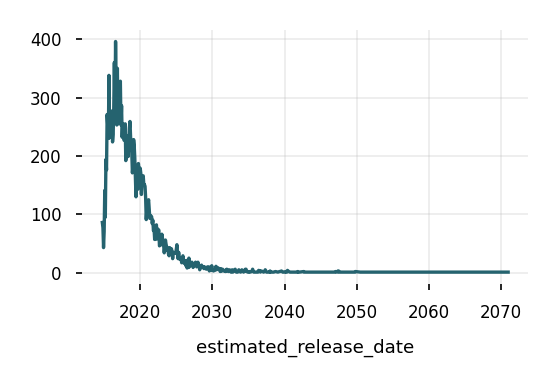

In [22]:
prison_sentences = sentence_data[
    (sentence_data["sentence_type"] == "Prison")
    & (sentence_data["total_sentence_months"] < 1200)
].copy()
prison_sentences["estimated_release_date"] = (
    prison_sentences["sentence_start_month"]
    + prison_sentences["total_sentence_months"].apply(pd.offsets.MonthBegin)
).dt.date
prison_sentences.groupby("estimated_release_date").count()["race"].plot()

In [23]:
print(
    "Total life sentences",
    len(sentence_data[sentence_data["total_sentence_months"] > 1200]),
)

Total life sentences 25


In [24]:
prison_sentences["analysis_date"] = datetime.date(2021, 12, 1)
current_prison_pop = prison_sentences[
    prison_sentences["estimated_release_date"] > prison_sentences["analysis_date"]
].copy()
current_prison_pop["remaining_sentence_length"] = (
    (current_prison_pop["estimated_release_date"] - current_prison_pop["analysis_date"])
    / np.timedelta64(1, "M")
).astype(int)
print(len(current_prison_pop))
current_prison_pop.head()

3016


,total_sentence_months,age_at_sentence_start,violent_criminal_history_points,primary_crime_type,CRIMHIST,CITIZEN,NWSTAT1,NWSTAT2,NWSTAT3,NWSTAT4,NWSTAT5,NOUSTAT,sentencing_district,sentence_type,race_or_ethnicity,race,ethnicity,sentence_start_month,statute_1,statute_2,statute_3,statute_4,statute_5,estimated_release_date,analysis_date,remaining_sentence_length
1,70,54.0,0.0,Drug Trafficking,1.0,1.0,21841A1,21841B1BVII,21846,NaN,NaN,3,Arizona,Prison,White,White,Non-Hispanic,2019-10-01,21-841,21-841,21-846,None,None,2025-08-01,2021-12-01,43
2,78,35.0,0.0,Drug Trafficking,1.0,1.0,21846,18924O,NaN,NaN,NaN,2,Florida South,Prison,Hispanic,White,Hispanic,2019-10-01,21-846,18-924,None,None,None,2026-04-01,2021-12-01,51
3,60,28.0,0.0,Drug Trafficking,1.0,1.0,21841A1,21841B1D,NaN,NaN,NaN,2,Texas North,Prison,White,White,Non-Hispanic,2019-10-01,21-841,21-841,None,None,None,2024-10-01,2021-12-01,34
5,60,19.0,0.0,Drug Trafficking,1.0,1.0,21841A1,18924C,21841B1D,NaN,NaN,3,Tennessee West,Prison,Black,Black,Non-Hispanic,2019-10-01,21-841,18-924,21-841,None,None,2024-10-01,2021-12-01,34
7,210,41.0,0.0,Drug Trafficking,1.0,1.0,21841A1,18924C1A,18922G1,21841B1D,18924A2,7,Iowa South,Prison,Black,Black,Non-Hispanic,2019-10-01,21-841,18-924,18-922,21-841,18-924,2037-04-01,2021-12-01,183


In [25]:
current_prison_pop.agg({"remaining_sentence_length": ["count", "median"]})

,remaining_sentence_length
count,3016.0
median,29.0


In [26]:
current_prison_pop.groupby(["primary_crime_type"]).agg(
    {"remaining_sentence_length": ["count", "median"]}
).sort_values([("remaining_sentence_length", "count")], ascending=False)

remaining_sentence_length       
                                                  count median
primary_crime_type                                            
Drug Trafficking                                   2246   26.0
Firearms                                            463   38.0
Money Laundering                                    124   36.5
Extortion/Racketeering                               49   53.0
Murder                                               48  172.5
Assault                                              27   82.0
Robbery                                              24   89.0
Other                                                20   48.5
Immigration                                          13    5.0
Administration of Justice                             1   34.0
Drug Communication Facilities                         1   34.0

In [27]:
current_prison_pop.groupby(["primary_crime_type", "race_or_ethnicity"]).agg(
    {"remaining_sentence_length": ["count", "median"]}
).unstack("race_or_ethnicity").sort_values(
    [("remaining_sentence_length", "count", "Hispanic")], ascending=False
)

remaining_sentence_length                 \
                                                  count                  
race_or_ethnicity                                 Black Hispanic Other   
primary_crime_type                                                       
Drug Trafficking                                  449.0   1344.0  85.0   
Firearms                                          298.0     99.0   6.0   
Money Laundering                                   37.0     27.0  16.0   
Extortion/Racketeering                             24.0     23.0   NaN   
Murder                                             23.0     21.0   NaN   
Immigration                                         NaN     13.0   NaN   
Assault                                            22.0      5.0   NaN   
Other                                              10.0      4.0   1.0   
Robbery                                            20.0      2.0   NaN   
Administration of Justice                           1.0      NaN   NaN   
Drug Communication Facilities                       1.0      NaN   NaN   

                                                                             \
                                             median                           
race_or_ethnicity             Unknown  White  Black Hispanic  Other Unknown   
primary_crime_type                                                            
Drug Trafficking                  2.0  366.0   32.0     23.0   18.0    31.0   
Firearms                          NaN   60.0   39.0     28.0   41.5     NaN   
Money Laundering                  NaN   44.0   40.0     37.0   35.0     NaN   
Extortion/Racketeering            NaN    2.0   49.5     62.0    NaN     NaN   
Murder                            NaN    4.0  163.0    146.0    NaN     NaN   
Immigration                       NaN    NaN    NaN      5.0    NaN     NaN   
Assault                           NaN    NaN  103.0     73.0    NaN     NaN   
Other                             NaN    5.0   39.0     64.5  146.0     NaN   
Robbery                           NaN    2.0   83.5    125.5    NaN     NaN   
Administration of Justice         NaN    NaN   34.0      NaN    NaN     NaN   
Drug Communication Facilities     NaN    NaN   34.0      NaN    NaN     NaN   

                                      
                                      
race_or_ethnicity              White  
primary_crime_type                    
Drug Trafficking                28.0  
Firearms                        38.0  
Money Laundering                33.0  
Extortion/Racketeering         199.5  
Murder                         357.5  
Immigration                      NaN  
Assault                          NaN  
Other                           54.0  
Robbery                        119.5  
Administration of Justice        NaN  
Drug Communication Facilities    NaN

In [28]:
pop_by_statute = (
    current_prison_pop.groupby(
        ["primary_crime_type", "statute_1", "statute_2", "statute_3"]
    )
    .agg({"remaining_sentence_length": ["count", "median", "min", "max"]})
    .sort_values([("remaining_sentence_length", "count")], ascending=False)
)
pop_by_statute.head()

remaining_sentence_length  \
                                                                     count   
primary_crime_type statute_1 statute_2 statute_3                             
Drug Trafficking   21-846    21-841    21-841                          406   
                   21-841    21-841    18-2                            277   
                                       21-846                          122   
                             18-924    21-841                          121   
Firearms           18-922    21-841    18-924                           81   

                                                                  
                                                 median min  max  
primary_crime_type statute_1 statute_2 statute_3                  
Drug Trafficking   21-846    21-841    21-841      22.0   1  270  
                   21-841    21-841    18-2        18.0   1  193  
                                       21-846      27.5   1  173  
                             18-924    21-841      40.0   3  201  
Firearms           18-922    21-841    18-924      51.0   5  589

In [29]:
statutes_per_crime_type = pd.DataFrame()
for crime_type, group in current_prison_pop.groupby("primary_crime_type"):
    statute_counts = pd.Series()
    for index in range(1, 6):
        statute_counts = pd.concat(
            [
                statute_counts,
                group[group[f"statute_{index}"].notnull()][f"statute_{index}"],
            ]
        )

    statutes_per_crime_type = pd.concat(
        [
            statutes_per_crime_type,
            pd.DataFrame(
                statute_counts.value_counts(dropna=False), columns=[crime_type]
            ),
        ]
    )
statutes_per_crime_type

/var/folders/0j/xkvk5w791vj4vtys8s77jn4w0000gn/T/ipykernel_42507/1405934034.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  statute_counts = pd.Series()


,Administration of Justice,Assault,Drug Communication Facilities,Drug Trafficking,Extortion/Racketeering,Firearms,Immigration,Money Laundering,Murder,Other,Robbery
18-1512,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21-841,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21-846,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18-2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18-1962,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
18-1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
18-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
18-922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
18-1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [30]:
crime_type = "Drug Communication Facilities"
statutes_per_crime_type[statutes_per_crime_type[crime_type].notnull()][crime_type]

21-843    1.0
Name: Drug Communication Facilities, dtype: float64

In [31]:
current_prison_pop["estimated_release_date"].describe()

count           3016
unique           247
top       2022-04-01
freq              82
Name: estimated_release_date, dtype: object

In [125]:
total_sentences_per_sentence_type = (
    sentence_data.groupby(["sentence_start_month", "sentence_type"])
    .count()["race"]
    .unstack("sentence_type")
)
total_sentences_per_sentence_type = total_sentences_per_sentence_type.merge(
    total_sentences, left_index=True, right_index=True
)
total_sentences_per_sentence_type.head()

,Fine Only,Prison,Probation,race
sentence_start_month,,,,
2014-10-01,6.0,431.0,44.0,481
2014-11-01,4.0,420.0,45.0,469
2014-12-01,5.0,472.0,55.0,532
2015-01-01,4.0,517.0,44.0,565
2015-02-01,3.0,514.0,35.0,552


In [126]:
total_sentences_per_sentence_type.columns

Index(['Fine Only', 'Prison', 'Probation', 'race'], dtype='object')

Text(0.5, 0, 'Sentencing Month')

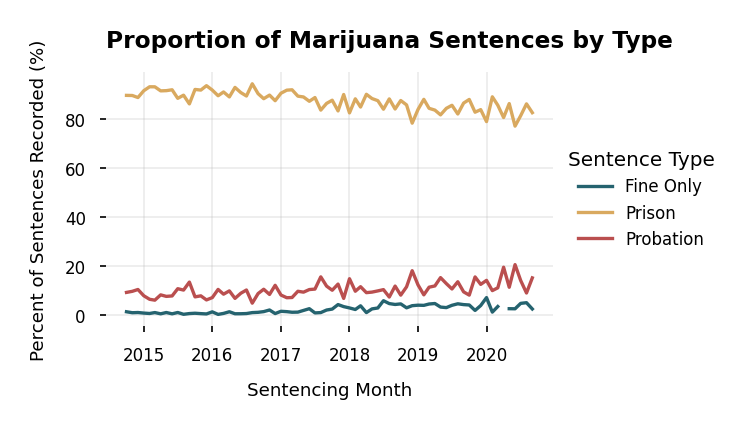

In [128]:
plot_df = pd.DataFrame()
for sentence_type in ["Fine Only", "Prison", "Probation"]:
    plot_df = pd.concat(
        [
            plot_df,
            pd.DataFrame(
                (
                    100
                    * total_sentences_per_sentence_type[sentence_type]
                    / total_sentences_per_sentence_type["race"]
                ),
                columns=[sentence_type],
            ),
        ],
        axis=1,
    )

plot_df.plot()
add_legend(title="Sentence Type")
plt.title("Proportion of Marijuana Sentences by Type")
plt.ylabel("Percent of Sentences Recorded (%)")
plt.xlabel("Sentencing Month")

In [90]:
total_sentences = pd.DataFrame(
    sentence_data.groupby(["sentence_start_month"]).count()["race"]
)

In [95]:
total_sentences_per_race = (
    sentence_data.groupby(["sentence_start_month", "race_or_ethnicity"])
    .count()["race"]
    .unstack("race_or_ethnicity")
)
total_sentences_per_race = total_sentences_per_race.merge(
    total_sentences, left_index=True, right_index=True
)
(total_sentences_per_race["White"] / total_sentences_per_race["race"]).mean()

0.12898805792202214

In [118]:
plot_df.head()

,Black,Hispanic,Other,Unknown,White
sentence_start_month,,,,,
2014-10-01,10.602911,67.983368,2.702703,4.365904,14.345114
2014-11-01,11.300640,69.296375,2.985075,3.411514,13.006397
2014-12-01,10.338346,70.300752,2.443609,1.879699,15.037594
2015-01-01,8.318584,72.212389,1.769912,1.592920,16.106195
2015-02-01,6.884058,78.623188,1.811594,0.905797,11.775362


Text(0.5, 0, 'Sentencing Month')

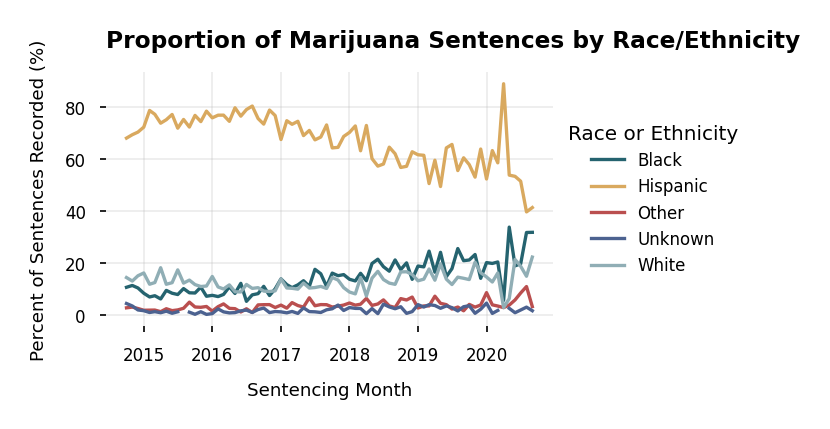

In [122]:
plot_df = pd.DataFrame()
for race in ["Black", "Hispanic", "Other", "Unknown", "White"]:
    plot_df = pd.concat(
        [
            plot_df,
            pd.DataFrame(
                (
                    100
                    * total_sentences_per_race[race]
                    / total_sentences_per_race["race"]
                ),
                columns=[race],
            ),
        ],
        axis=1,
    )

plot_df.plot()
add_legend(title="Race or Ethnicity")
plt.title("Proportion of Marijuana Sentences by Race/Ethnicity")
plt.ylabel("Percent of Sentences Recorded (%)")
plt.xlabel("Sentencing Month")

Text(0.5, 0, 'Sentencing Month')

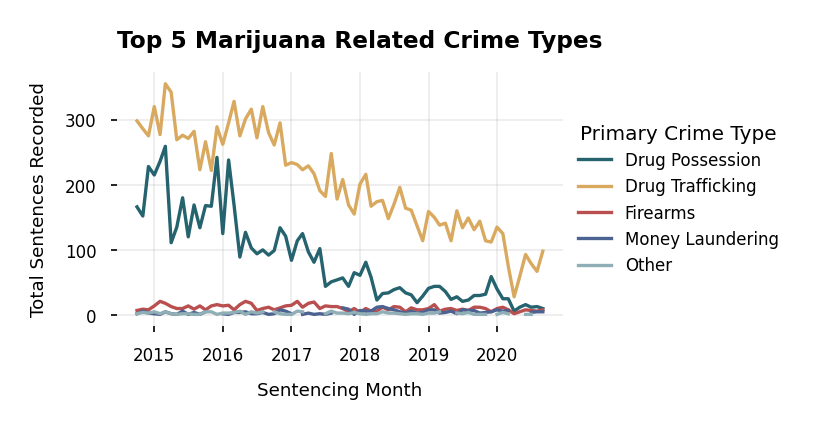

In [44]:
top_crime_types = sentence_data["primary_crime_type"].value_counts().head().index
sentence_data[sentence_data["primary_crime_type"].isin(top_crime_types)].groupby(
    ["sentence_start_month", "primary_crime_type"]
).count()["race"].unstack("primary_crime_type").plot()
add_legend(title="Primary Crime Type")
plt.title("Top 5 Marijuana Related Crime Types")
plt.ylabel("Total Sentences Recorded")
plt.xlabel("Sentencing Month")

Text(0.5, 0, 'Sentencing Month')

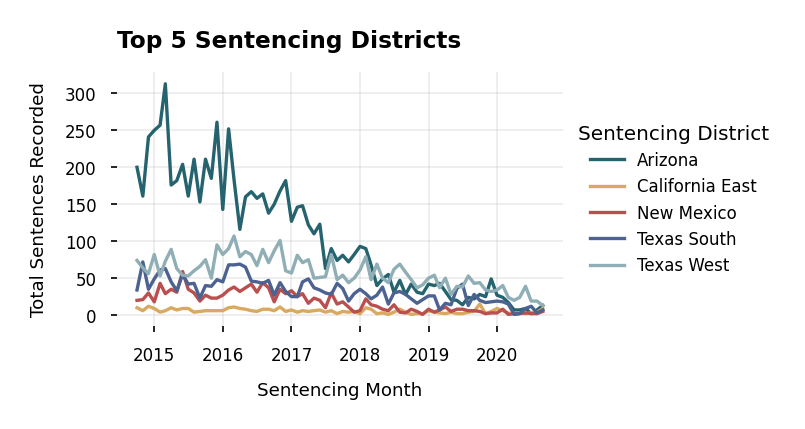

In [45]:
top_districts = sentence_data["sentencing_district"].value_counts().head().index
sentence_data[sentence_data["sentencing_district"].isin(top_districts)].groupby(
    ["sentence_start_month", "sentencing_district"]
).count()["race"].unstack("sentencing_district").plot()
add_legend(title="Sentencing District")
plt.title("Top 5 Sentencing Districts")
plt.ylabel("Total Sentences Recorded")
plt.xlabel("Sentencing Month")

In [46]:
sentence_data[(sentence_data["sentence_type"] == "Prison")].groupby(
    "primary_crime_type"
)["total_sentence_months"].describe().sort_values(by="count", ascending=False).round(2)

,count,mean,std,min,25%,50%,75%,max
primary_crime_type,,,,,,,,
Drug Trafficking,13331.0,36.31,261.24,0.0,8.00,18.0,37.00,9996.0
Drug Possession,5098.0,3.99,2.95,0.0,0.00,6.0,6.00,46.0
Firearms,766.0,129.93,717.86,0.0,41.00,66.0,96.75,9996.0
Money Laundering,252.0,54.50,49.52,0.0,18.00,40.0,72.00,240.0
Immigration,136.0,27.34,18.07,0.0,15.00,24.0,33.75,72.0
Extortion/Racketeering,132.0,297.11,1487.24,0.0,21.00,34.0,98.00,9996.0
Other,116.0,117.70,926.73,0.0,4.00,12.0,31.75,9996.0
Administration of Justice,79.0,9.09,11.36,0.0,0.00,6.0,13.50,77.0
Murder,59.0,1184.64,2992.16,0.0,109.00,219.0,301.50,9996.0


Text(0.5, 0, 'Sentencing Month')

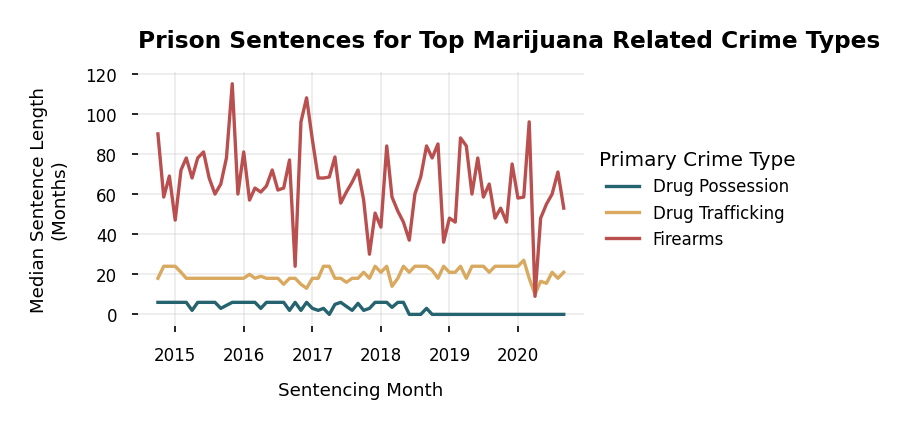

In [48]:
common_prison_sentences = sentence_data[
    (sentence_data["sentence_type"] == "Prison")
    & sentence_data["primary_crime_type"].isin(top_crime_types[:3])
]
common_prison_sentences.groupby(["primary_crime_type", "sentence_start_month"])[
    "total_sentence_months"
].median().unstack("primary_crime_type").plot()
add_legend(title="Primary Crime Type")
plt.title("Prison Sentences for Top Marijuana Related Crime Types")
plt.ylabel("Median Sentence Length\n(Months)")
plt.xlabel("Sentencing Month")

In [49]:
sentence_data[
    (sentence_data["sentence_type"] == "Prison")
    & (sentence_data["total_sentence_months"] == 0)
].head()

,total_sentence_months,age_at_sentence_start,violent_criminal_history_points,primary_crime_type,CRIMHIST,CITIZEN,NWSTAT1,NWSTAT2,NWSTAT3,NWSTAT4,NWSTAT5,NOUSTAT,sentencing_district,sentence_type,race_or_ethnicity,race,ethnicity,sentence_start_month,statute_1,statute_2,statute_3,statute_4,statute_5
6,0,53.0,0.0,Drug Trafficking,1.0,1.0,21846,NaN,NaN,NaN,NaN,1,Penn. East,Prison,Black,Black,Non-Hispanic,2019-10-01,21-846,None,None,None,None
8,0,36.0,0.0,Drug Trafficking,1.0,1.0,21846,21841A1,21841B1B,NaN,NaN,3,Texas South,Prison,Hispanic,Black,Hispanic,2019-10-01,21-846,21-841,21-841,None,None
15,0,20.0,0.0,Drug Trafficking,1.0,1.0,21841A1,21841B1BVII,21846.0,NaN,NaN,3,Arizona,Prison,Hispanic,White,Hispanic,2019-10-01,21-841,21-841,21-846,None,None
16,0,59.0,0.0,Drug Trafficking,1.0,1.0,21841A1,21841B1BVII,NaN,NaN,NaN,2,Arizona,Prison,White,White,Non-Hispanic,2019-10-01,21-841,21-841,None,None,None
29,0,27.0,0.0,Drug Trafficking,1.0,1.0,21841A1,21841B1D,NaN,NaN,NaN,2,Texas West,Prison,Black,Black,Non-Hispanic,2019-10-01,21-841,21-841,None,None,None


In [50]:
sentence_data[sentence_data["total_sentence_months"] > 1200].head()

,total_sentence_months,age_at_sentence_start,violent_criminal_history_points,primary_crime_type,CRIMHIST,CITIZEN,NWSTAT1,NWSTAT2,NWSTAT3,NWSTAT4,NWSTAT5,NOUSTAT,sentencing_district,sentence_type,race_or_ethnicity,race,ethnicity,sentence_start_month,statute_1,statute_2,statute_3,statute_4,statute_5
1064,9996,32.0,0.0,Murder,1.0,3.0,181962D,181959A1,181963,182.0,NaN,4,Ohio South,Prison,Hispanic,White,Hispanic,2020-05-01,18-1962,18-1959,18-1963,18-2,None
1129,9996,32.0,0.0,Murder,1.0,1.0,181962D,181959A1,18924J,21846,181963A,8,N Carolina East,Prison,Black,Black,Non-Hispanic,2020-06-01,18-1962,18-1959,18-924,21-846,18-1963
1322,9996,46.0,0.0,Murder,1.0,1.0,181962D,181959A5,181959A1,21846,18924J1,7,New York South,Prison,White,White,Non-Hispanic,2020-07-01,18-1962,18-1959,18-1959,21-846,18-924
1343,9996,53.0,0.0,Murder,1.0,2.0,21846,18924C1AIII,18924J,18371,21841A1,6,California North,Prison,Other,Asian or Pacific Islander,Non-Hispanic,2020-08-01,21-846,18-924,18-924,18-371,21-841
3581,9996,38.0,0.0,Murder,1.0,1.0,21846,18924J1,21841A1,21841B1D,NaN,4,Nevada,Prison,Black,Black,Non-Hispanic,2019-08-01,21-846,18-924,21-841,21-841,None


In [51]:
sentence_data["primary_crime_type"].value_counts()

Drug Trafficking                 14580
Drug Possession                   6146
Firearms                           782
Money Laundering                   297
Other                              175
Administration of Justice          159
Extortion/Racketeering             141
Immigration                        137
Drug Communication Facilities       79
Murder                              59
Robbery                             43
Assault                             37
Name: primary_crime_type, dtype: int64

In [52]:
top_crime_types

Index(['Drug Trafficking', 'Drug Possession', 'Firearms', 'Money Laundering',
       'Other'],
      dtype='object')

In [53]:
min(sentence_data["sentence_start_month"])

datetime.date(2014, 10, 1)

Text(0.5, 0, 'Sentencing Month')

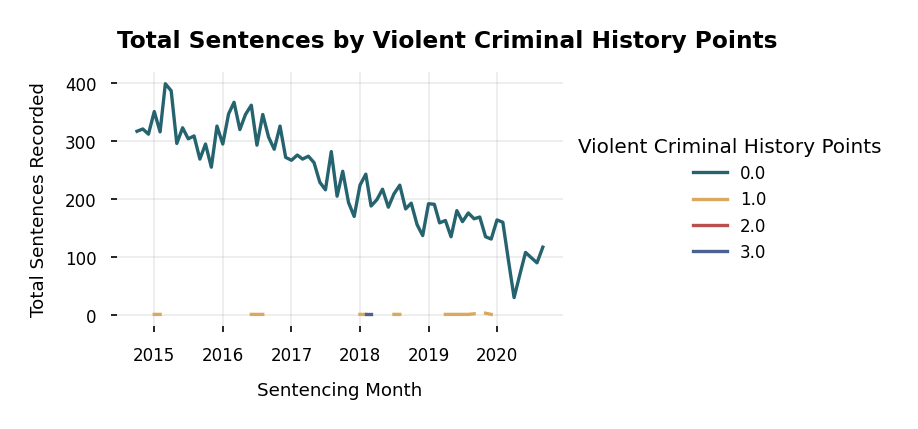

In [58]:
sentence_data.groupby(
    ["sentence_start_month", "violent_criminal_history_points"]
).count()["race"].unstack("violent_criminal_history_points").plot()
add_legend(title="Violent Criminal History Points")
plt.title("Total Sentences by Violent Criminal History Points")
plt.ylabel("Total Sentences Recorded")
plt.xlabel("Sentencing Month")

In [60]:
sentence_data[sentence_data["sentence_type"] == "Prison"][
    "violent_criminal_history_points"
].value_counts(dropna=False)

0.0    14990
NaN     5060
1.0       29
2.0       10
3.0        5
Name: violent_criminal_history_points, dtype: int64

In [63]:
(14990 + 5060) / len(sentence_data[sentence_data["sentence_type"] == "Prison"])

0.9978102916293421

In [62]:
current_prison_pop[(current_prison_pop["statute_1"] == "18-924")][
    [
        "primary_crime_type",
        "NWSTAT1",
        "NWSTAT2",
        "NWSTAT3",
        "NWSTAT4",
        "NWSTAT5",
        "total_sentence_months",
        "age_at_sentence_start",
        "sentence_type",
        "sentence_start_month",
        "estimated_release_date",
        "sentencing_district",
    ]
]

,primary_crime_type,NWSTAT1,NWSTAT2,NWSTAT3,NWSTAT4,NWSTAT5,total_sentence_months,age_at_sentence_start,sentence_type,sentence_start_month,estimated_release_date,sentencing_district
100,Drug Trafficking,18924C1A,21841A1,21841B1D,NaN,NaN,60,22.0,Prison,2019-10-01,2024-10-01,Puerto Rico
116,Drug Trafficking,18924C1A,21841A1,182,21841B1D,NaN,60,33.0,Prison,2019-10-01,2024-10-01,Puerto Rico
121,Firearms,18924O,18922K,21846,18924C,18924A2,90,35.0,Prison,2019-10-01,2027-04-01,California South
261,Drug Trafficking,18924C1AI,21841B1D,NaN,NaN,NaN,60,32.0,Prison,2019-11-01,2024-11-01,Puerto Rico
593,Drug Trafficking,18924C1AI,21841B1D,NaN,NaN,NaN,60,42.0,Prison,2019-12-01,2024-12-01,Puerto Rico
626,Drug Trafficking,18924C1A,21841A1,21841B1D,NaN,NaN,130,25.0,Prison,2020-01-01,2030-11-01,Rhode Island
632,Drug Trafficking,18924C1A,21841A1,21841B1D,NaN,NaN,62,42.0,Prison,2019-12-01,2025-02-01,Puerto Rico
653,Firearms,18924C1AI,21841A1,265861D,21841B1C,NaN,132,47.0,Prison,2020-01-01,2031-01-01,Kentucky West
660,Drug Trafficking,18924C1AI,21841A1,21841B1D,NaN,NaN,60,41.0,Prison,2020-01-01,2025-01-01,Puerto Rico
661,Drug Trafficking,18924C1A,21841A1,NaN,NaN,NaN,63,29.0,Prison,2020-01-01,2025-04-01,Puerto Rico


In [67]:
latest_admissions = sentence_data[
    sentence_data["sentence_start_month"] == datetime.date(2020, 9, 1)
]
print(len(latest_admissions))
latest_admissions.head()

126


,total_sentence_months,age_at_sentence_start,violent_criminal_history_points,primary_crime_type,CRIMHIST,CITIZEN,NWSTAT1,NWSTAT2,NWSTAT3,NWSTAT4,NWSTAT5,NOUSTAT,sentencing_district,sentence_type,race_or_ethnicity,race,ethnicity,sentence_start_month,statute_1,statute_2,statute_3,statute_4,statute_5
1426,84,29.0,0.0,Drug Trafficking,1.0,1.0,21846,21841A1,18922G1,21841B1C,NaN,4,Ohio North,Prison,Black,Black,Non-Hispanic,2020-09-01,21-846,21-841,18-922,21-841,None
1427,21,20.0,0.0,Drug Trafficking,0.0,3.0,4670503A1,4670502C1,4670506A,NaN,NaN,3,Puerto Rico,Prison,Black,Black,Unknown,2020-09-01,46-70503,46-70502,46-70506,None,None
1428,12,21.0,NaN,Drug Possession,NaN,3.0,21846,NaN,NaN,NaN,NaN,1,Maryland,Prison,Hispanic,White,Hispanic,2020-09-01,21-846,None,None,None,None
1429,132,26.0,0.0,Drug Trafficking,1.0,1.0,181962D,NaN,NaN,NaN,NaN,1,California East,Prison,White,White,Non-Hispanic,2020-09-01,18-1962,None,None,None,None
1430,0,21.0,0.0,Other,1.0,1.0,21844A,187,1813,NaN,NaN,3,Florida North,Probation,Black,Black,Non-Hispanic,2020-09-01,21-844,18-7,18-13,None,None


In [68]:
sentence_data[
    (sentence_data["sentence_start_month"] >= datetime.date(2020, 1, 1))
    & (sentence_data["sentence_type"] == "Prison")
]["sentence_start_month"].value_counts().sort_index()

2020-01-01    157
2020-02-01    162
2020-03-01    101
2020-04-01     29
2020-05-01     69
2020-06-01     94
2020-07-01     87
2020-08-01     87
2020-09-01    104
Name: sentence_start_month, dtype: int64

In [83]:
print("Average monthly prison admissions in 2020")
sentence_data[
    (sentence_data["sentence_start_month"] >= datetime.date(2020, 1, 1))
    & (sentence_data["sentence_type"] == "Prison")
]["sentence_start_month"].value_counts().mean()

Average monthly prison admissions in 2020


98.88888888888889

In [84]:
print("Average monthly prison admissions in 2020")
sentence_data[
    (sentence_data["sentence_start_month"] >= datetime.date(2020, 1, 1))
    & (sentence_data["sentence_type"] == "Probation")
]["sentence_start_month"].value_counts().mean()

Average monthly prison admissions in 2020


15.88888888888889

In [85]:
print("Average monthly prison admissions in 2020")
sentence_data[
    (sentence_data["sentence_start_month"] >= datetime.date(2020, 1, 1))
    & (sentence_data["sentence_type"] == "Fine Only")
]["sentence_start_month"].value_counts().mean()

Average monthly prison admissions in 2020


4.75

In [71]:
statute_class = pd.read_csv("statute_classification.csv")
statute_class["statute_count"] = 0
statute_class.head()

,statute,sentence_update_percent,statute_count
0,181111,0,0
1,181114,0,0
2,181117,0,0
3,181958,0,0
4,18751,0,0


In [72]:
test = "18922G3"
mask = [(statute_string in test) for statute_string in statute_class["statute"].values]
applicable_statutes = statute_class[mask]
applicable_statutes

,statute,sentence_update_percent,statute_count
51,18922,20,0
100,18922G3,100,0


In [73]:
for index, row in current_prison_pop.iterrows():
    total_sentence_update_percent = 100
    for statute_index in range(1, 6):
        statute = str(row[f"NWSTAT{statute_index}"])
        if (statute is None) | (statute == "nan"):
            continue
        mask = [
            (statute_string in statute)
            for statute_string in statute_class["statute"].values
        ]
        applicable_statutes = statute_class[mask]
        if len(applicable_statutes) == 0:
            raise ValueError(f"No statute found to match '{statute}'")
        #         elif len(applicable_statutes) > 2:
        #             raise ValueError(f"Too many statute matched found for '{statute}'")

        best_match_index = np.argmax(
            [
                fuzz.ratio(statute, matched_statute)
                for matched_statute in applicable_statutes["statute"]
            ]
        )

        sentence_update_percent = applicable_statutes.iloc[best_match_index][
            "sentence_update_percent"
        ]
        current_prison_pop.loc[
            index, f"sentence_{statute_index}_impact"
        ] = sentence_update_percent
        statute_class.loc[
            applicable_statutes.index[best_match_index], "statute_count"
        ] += 1

        # Take the most severe sentence which will have the smallest impact percent
        if sentence_update_percent < total_sentence_update_percent:
            total_sentence_update_percent = sentence_update_percent

    current_prison_pop.loc[
        index, "sentence_update_percent"
    ] = total_sentence_update_percent
statute_class.head()

,statute,sentence_update_percent,statute_count
0,181111,0,0
1,181114,0,2
2,181117,0,1
3,181958,0,3
4,18751,0,2


In [74]:
current_prison_pop.groupby("sentence_update_percent").count()["race"]

sentence_update_percent
0.0        43
5.0       129
20.0      586
100.0    2258
Name: race, dtype: int64

In [75]:
current_prison_pop.groupby(["sentence_update_percent", "primary_crime_type"]).count()[
    "race"
].unstack("primary_crime_type").sort_index(ascending=False).fillna(0)

primary_crime_type,Administration of Justice,Assault,Drug Communication Facilities,Drug Trafficking,Extortion/Racketeering,Firearms,Immigration,Money Laundering,Murder,Other,Robbery
sentence_update_percent,,,,,,,,,,,
100.0,0.0,1.0,1.0,2027.0,0.0,110.0,0.0,118.0,0.0,1.0,0.0
20.0,0.0,17.0,0.0,143.0,41.0,333.0,0.0,5.0,34.0,4.0,9.0
5.0,0.0,3.0,0.0,68.0,2.0,16.0,13.0,1.0,4.0,7.0,15.0
0.0,1.0,6.0,0.0,8.0,6.0,4.0,0.0,0.0,10.0,8.0,0.0


In [76]:
current_prison_pop[current_prison_pop["primary_crime_type"] == "Assault"]

,total_sentence_months,age_at_sentence_start,violent_criminal_history_points,primary_crime_type,CRIMHIST,CITIZEN,NWSTAT1,NWSTAT2,NWSTAT3,NWSTAT4,NWSTAT5,NOUSTAT,sentencing_district,sentence_type,race_or_ethnicity,race,ethnicity,sentence_start_month,statute_1,statute_2,statute_3,statute_4,statute_5,estimated_release_date,analysis_date,remaining_sentence_length,sentence_1_impact,sentence_2_impact,sentence_3_impact,sentence_update_percent,sentence_4_impact,sentence_5_impact
119,121,26.0,2.0,Assault,1.0,1.0,181962D,NaN,NaN,NaN,NaN,1,Tennessee West,Prison,Black,Black,Unknown,2019-11-01,18-1962,None,None,None,None,2029-12-01,2021-12-01,96,20.0,NaN,NaN,20.0,NaN,NaN
127,78,22.0,0.0,Assault,1.0,1.0,181962D,NaN,NaN,NaN,NaN,1,Connecticut,Prison,Black,Black,Non-Hispanic,2019-10-01,18-1962,None,None,None,None,2026-04-01,2021-12-01,51,20.0,NaN,NaN,20.0,NaN,NaN
128,87,21.0,0.0,Assault,1.0,1.0,181962D,NaN,NaN,NaN,NaN,1,Connecticut,Prison,Black,Black,Non-Hispanic,2019-10-01,18-1962,None,None,None,None,2027-01-01,2021-12-01,61,20.0,NaN,NaN,20.0,NaN,NaN
148,168,23.0,0.0,Assault,1.0,1.0,181962D,NaN,NaN,NaN,NaN,1,Connecticut,Prison,Black,Black,Non-Hispanic,2019-11-01,18-1962,None,None,None,None,2033-11-01,2021-12-01,143,20.0,NaN,NaN,20.0,NaN,NaN
171,75,30.0,0.0,Assault,1.0,1.0,21841A1,18924C1A,18111A1,21841B1D,18111B,5,Mississippi North,Prison,Black,Black,Non-Hispanic,2019-11-01,21-841,18-924,18-111,21-841,18-111,2026-02-01,2021-12-01,50,100.0,100.0,0.0,0.0,100.0,0.0
186,75,21.0,0.0,Assault,1.0,1.0,181962D,NaN,NaN,NaN,NaN,1,Michigan East,Prison,Black,Black,Non-Hispanic,2019-11-01,18-1962,None,None,None,None,2026-02-01,2021-12-01,50,20.0,NaN,NaN,20.0,NaN,NaN
229,280,31.0,0.0,Assault,1.0,1.0,181959A5,18924C,21841A1,NaN,NaN,3,Tennessee West,Prison,Black,Black,Non-Hispanic,2019-10-01,18-1959,18-924,21-841,None,None,2043-02-01,2021-12-01,254,0.0,100.0,100.0,0.0,NaN,NaN
545,144,27.0,0.0,Assault,1.0,1.0,181962D,NaN,NaN,NaN,NaN,1,Connecticut,Prison,Black,Black,Non-Hispanic,2020-01-01,18-1962,None,None,None,None,2032-01-01,2021-12-01,121,20.0,NaN,NaN,20.0,NaN,NaN
1047,41,36.0,0.0,Assault,1.0,3.0,18111A1,21844A,NaN,NaN,NaN,2,New York West,Prison,Black,Black,Non-Hispanic,2020-05-01,18-111,21-844,None,None,None,2023-10-01,2021-12-01,21,0.0,100.0,NaN,0.0,NaN,NaN
1305,90,32.0,0.0,Assault,1.0,1.0,181962D,NaN,NaN,NaN,NaN,1,Missouri West,Prison,Hispanic,Black,Hispanic,2020-07-01,18-1962,None,None,None,None,2028-01-01,2021-12-01,73,20.0,NaN,NaN,20.0,NaN,NaN


In [77]:
current_prison_pop[
    (current_prison_pop["sentence_update_percent"] == 0)
    & (current_prison_pop["primary_crime_type"] == "Drug Trafficking")
]

,total_sentence_months,age_at_sentence_start,violent_criminal_history_points,primary_crime_type,CRIMHIST,CITIZEN,NWSTAT1,NWSTAT2,NWSTAT3,NWSTAT4,NWSTAT5,NOUSTAT,sentencing_district,sentence_type,race_or_ethnicity,race,ethnicity,sentence_start_month,statute_1,statute_2,statute_3,statute_4,statute_5,estimated_release_date,analysis_date,remaining_sentence_length,sentence_1_impact,sentence_2_impact,sentence_3_impact,sentence_update_percent,sentence_4_impact,sentence_5_impact
639,34,24.0,0.0,Drug Trafficking,1.0,1.0,21846,18111B,21841A1,21841B1C,NaN,4,Missouri East,Prison,Black,Black,Non-Hispanic,2020-01-01,21-846,18-111,21-841,21-841,None,2022-11-01,2021-12-01,11,100.0,0.0,100.0,0.0,100.0,NaN
2463,45,29.0,0.0,Drug Trafficking,1.0,1.0,181512C2,182,NaN,NaN,NaN,2,Virginia East,Prison,Black,Black,Non-Hispanic,2019-02-01,18-1512,18-2,None,None,None,2022-11-01,2021-12-01,11,0.0,100.0,NaN,0.0,NaN,NaN
2708,60,23.0,0.0,Drug Trafficking,1.0,1.0,21841A1,18115A1B,21841B1BVII,21846,NaN,4,Arizona,Prison,Hispanic,White,Hispanic,2019-03-01,21-841,18-115,21-841,21-846,None,2024-03-01,2021-12-01,26,100.0,0.0,100.0,0.0,100.0,NaN
3476,252,22.0,0.0,Drug Trafficking,1.0,1.0,181962D,181959A3,18924C,NaN,NaN,3,Michigan East,Prison,Black,Black,Non-Hispanic,2019-08-01,18-1962,18-1959,18-924,None,None,2040-08-01,2021-12-01,224,20.0,0.0,100.0,0.0,NaN,NaN
3763,54,48.0,0.0,Drug Trafficking,1.0,1.0,21841A1,21846,18751A,21841B1D,21851.0,5,Michigan West,Prison,White,White,Non-Hispanic,2019-09-01,21-841,21-846,18-751,21-841,21-851,2024-03-01,2021-12-01,26,100.0,100.0,0.0,0.0,100.0,20.0
6701,72,21.0,0.0,Drug Trafficking,1.0,3.0,21841A1,18111A,21841B1B,18111B,182,5,Texas South,Prison,Hispanic,White,Hispanic,2018-07-01,21-841,18-111,21-841,18-111,18-2,2024-07-01,2021-12-01,30,100.0,0.0,100.0,0.0,0.0,100.0
7091,78,36.0,0.0,Drug Trafficking,1.0,2.0,18751,181956H,21846,21841A1,21841B1B,5,California East,Prison,Other,Asian or Pacific Islander,Non-Hispanic,2016-10-01,18-751,18-1956,21-846,21-841,21-841,2023-04-01,2021-12-01,15,0.0,100.0,100.0,0.0,100.0,100.0
16890,144,46.0,0.0,Drug Trafficking,1.0,1.0,18922G1,21841A1,182252AA5B,18924A2,21841B1C,6,Michigan East,Prison,White,White,Non-Hispanic,2014-10-01,18-922,21-841,18-2252,18-924,21-841,2026-10-01,2021-12-01,57,20.0,100.0,0.0,0.0,20.0,100.0


In [78]:
current_prison_pop.groupby(["sentence_update_percent", "sentencing_district"]).count()[
    "race"
].unstack("sentencing_district").sort_index(ascending=False).fillna(0)

sentencing_district,Alabama Mid,Alabama North,Alabama South,Alaska,Arizona,Arkansas East,Arkansas West,California Central,California East,California North,California South,Colorado,Connecticut,Delaware,Dist of Columbia,Florida Mid,Florida North,Florida South,Georgia Mid,Georgia North,Georgia South,Idaho,Illinois Cent,Illinois North,Illinois South,Indiana North,Indiana South,Iowa North,Iowa South,Kansas,Kentucky East,Kentucky West,Louisiana East,Louisiana Middle,Louisiana West,Maine,Maryland,Massachusetts,Michigan East,Michigan West,Minnesota,Mississippi North,Mississippi South,Missouri East,Missouri West,Montana,N Carolina East,N Carolina Mid,N Carolina West,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York East,New York North,New York South,New York West,North Dakota,Ohio North,Ohio South,Oklahoma East,Oklahoma North,Oklahoma West,Oregon,Penn. East,Penn. Mid,Penn. West,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee East,Tennessee Mid,Tennessee West,Texas East,Texas North,Texas South,Texas West,Utah,Vermont,Virgin Islands,Virginia East,Virginia West,W Virginia North,W Virginia South,Washington East,Washington West,Wisconsin East,Wisconsin West,Wyoming
sentence_update_percent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100.0,16.0,8.0,18.0,3.0,126.0,28.0,7.0,14.0,63.0,12.0,27.0,18.0,7.0,0.0,0.0,40.0,14.0,30.0,9.0,9.0,24.0,7.0,5.0,12.0,5.0,11.0,15.0,9.0,35.0,14.0,33.0,5.0,1.0,3.0,6.0,1.0,21.0,7.0,24.0,16.0,5.0,1.0,14.0,21.0,41.0,2.0,25.0,9.0,18.0,15.0,3.0,1.0,4.0,15.0,15.0,25.0,17.0,21.0,1.0,11.0,10.0,2.0,4.0,12.0,7.0,14.0,11.0,5.0,121.0,2.0,15.0,5.0,27.0,4.0,22.0,63.0,45.0,514.0,344.0,2.0,0.0,3.0,23.0,6.0,3.0,6.0,2.0,9.0,5.0,2.0,3.0
20.0,12.0,10.0,2.0,0.0,5.0,2.0,1.0,5.0,11.0,7.0,8.0,2.0,5.0,2.0,4.0,11.0,9.0,11.0,5.0,8.0,9.0,0.0,5.0,1.0,2.0,5.0,3.0,7.0,10.0,4.0,3.0,5.0,2.0,5.0,2.0,1.0,19.0,6.0,39.0,3.0,2.0,3.0,4.0,15.0,17.0,0.0,15.0,16.0,14.0,1.0,5.0,0.0,2.0,3.0,4.0,2.0,43.0,16.0,1.0,14.0,2.0,0.0,4.0,5.0,0.0,5.0,0.0,3.0,7.0,2.0,17.0,0.0,7.0,1.0,13.0,3.0,13.0,22.0,28.0,0.0,0.0,0.0,8.0,8.0,1.0,1.0,0.0,3.0,2.0,1.0,2.0
5.0,1.0,0.0,0.0,0.0,9.0,0.0,0.0,4.0,22.0,6.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,12.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,3.0,10.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
statute_string = "18-2"
pd.concat(
    [
        current_prison_pop[current_prison_pop[f"statute_{index}"] == statute_string][
            f"NWSTAT{index}"
        ]
        for index in range(1, 6)
    ]
).value_counts(dropna=False)

182      475
182.0     54
182A       2
dtype: int64

In [81]:
statute_class.to_csv("statute_count.csv")

In [82]:
current_prison_pop[
    current_prison_pop["primary_crime_type"] == "Administration of Justice"
]

,total_sentence_months,age_at_sentence_start,violent_criminal_history_points,primary_crime_type,CRIMHIST,CITIZEN,NWSTAT1,NWSTAT2,NWSTAT3,NWSTAT4,NWSTAT5,NOUSTAT,sentencing_district,sentence_type,race_or_ethnicity,race,ethnicity,sentence_start_month,statute_1,statute_2,statute_3,statute_4,statute_5,estimated_release_date,analysis_date,remaining_sentence_length,sentence_1_impact,sentence_2_impact,sentence_3_impact,sentence_update_percent,sentence_4_impact,sentence_5_impact
6037,77,26.0,0.0,Administration of Justice,1.0,1.0,21841B1D,181512A2,21846,181512J,182,5,New York South,Prison,Black,Black,Non-Hispanic,2018-05-01,21-841,18-1512,21-846,18-1512,18-2,2024-10-01,2021-12-01,34,100.0,0.0,100.0,0.0,0.0,100.0
